# Winter 2022 Data Science Intern Challenge 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Question 1 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [5]:
# importing datasset
df = pd.read_excel(r'.\challenge.xlsx')

In [6]:
#visualizing the dataset
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


##### Data Exploration

In [7]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


This shows there are no null values in the data.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed67a161f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed67a168b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed67a08e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed67a16f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed679fa310>],
 'means': []}

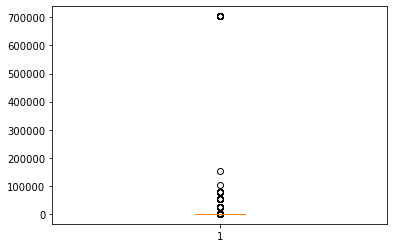

In [10]:
plt.boxplot(df.order_amount, patch_artist=None, widths=None)

###### What metric would you report for this dataset?

Since there are outliers in the dataset the appropriate metric is the median.

###### What is its value?

In [13]:
print('The value is', df.order_amount.median())

The value is 284.0


### Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

###### a. How many orders were shipped by Speedy Express in total?

After joining the Orders and Shippers,count the number of entries where the shipper name is Speedy Express. 
Number of orders shipped by Speedy Express in total is 54

 ##### b. What is the last name of the employee with the most orders?

In [ ]:
SELECT Employees.LastName, COUNT() AS NumberOfOrders
FROM Orders JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName ORDER BY NumOrders DESC
LIMIT 1

The employee with the last name Peacock had the most orders, at 40.

##### c. What product was ordered the most by customers in Germany?

In [ ]:
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS "OrderAmount"
FROM Orders JOIN Customers ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails ON [OrderDetails].OrderID = Orders.OrderID
JOIN Products ON [Products].ProductID = OrderDetails.ProductID WHERE Customers.Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY OrderAmount DESC
LIMIT 1

The product most ordered by German customers is Boston Crab Meat, having a total of 160 orders.